In [2]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        %matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

### Working with a random sample (about 10%) from the airplanes dataset

In [3]:
df = pd.read_csv('slim_airplanes.csv')

In [4]:
df.shape

(531461, 14)

In [5]:
del df['Unnamed: 0']

### Relevant variables chosen

In [6]:
df.columns.values

array(['Quarter', 'Month', 'UniqueCarrier', 'FlightNum', 'OriginAirportID',
       'DestAirportID', 'CRSDepTime', 'DepDelay', 'CRSArrTime', 'ArrDelay',
       'Cancelled', 'CancellationCode', 'Distance'], dtype=object)

### Most repeated quarter

In [7]:
mode = stats.mode(df[['Quarter']])

In [8]:
mode

ModeResult(mode=array([[3]]), count=array([[149615]]))

In [13]:
dfg = df.groupby('Quarter').count()


In [18]:
dfn = pd.DataFrame({'Quarter': dfg.index, 'Count': dfg['Month']})

In [21]:
dfn.index = np.arange(4)

In [22]:
dfn

,Count,Quarter
0,89913,1
1,148600,2
2,149615,3
3,143333,4


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

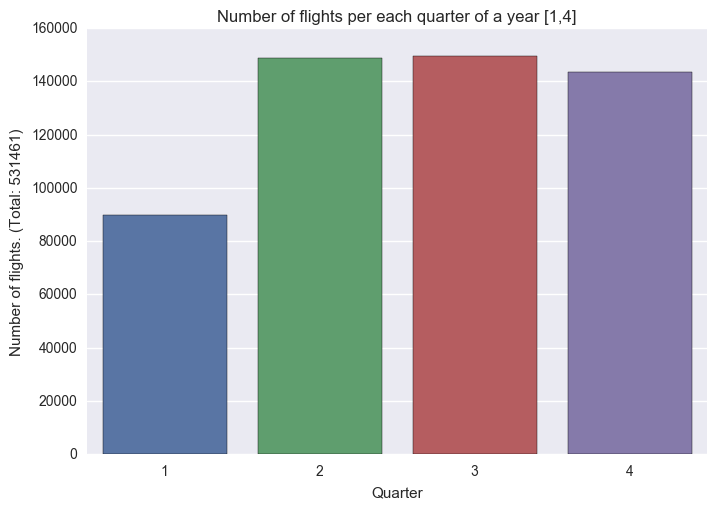

In [30]:
sns.barplot(x='Quarter', y='Count', data=dfn)
sns.utils.axlabel('Quarter', 'Number of flights. (Total: ' + str(sum(dfn['Count'])) + ')')
plt.title('Number of flights per each quarter of a year [1,4]')
plt.savefig('graph/quarter_flights.png', bbox_inches='tight')

### Most repeated month

In [19]:
mode = stats.mode(df[['Month']])

In [20]:
mode

ModeResult(mode=array([[7]]), count=array([[52070]]))

### Flight mode

In [69]:
mode = stats.mode(df[['FlightNum']])

In [70]:
mode

ModeResult(mode=array([[469]]), count=array([[376]]))

### Frequency of flights

In [77]:
dfg = df.groupby('FlightNum').count()
dfn = pd.DataFrame({'FlightNum': dfg.index, 'Count': dfg['Month']})
dfn.index = np.arange(dfn.shape[0])

In [65]:
dfn.tail(10)

,Count,FlightNum
6670,61,7420
6671,1,7421
6672,38,7423
6673,54,7426
6674,34,7428
6675,67,7429
6676,3,7430
6677,32,7431
6678,64,7432
6679,45,7438


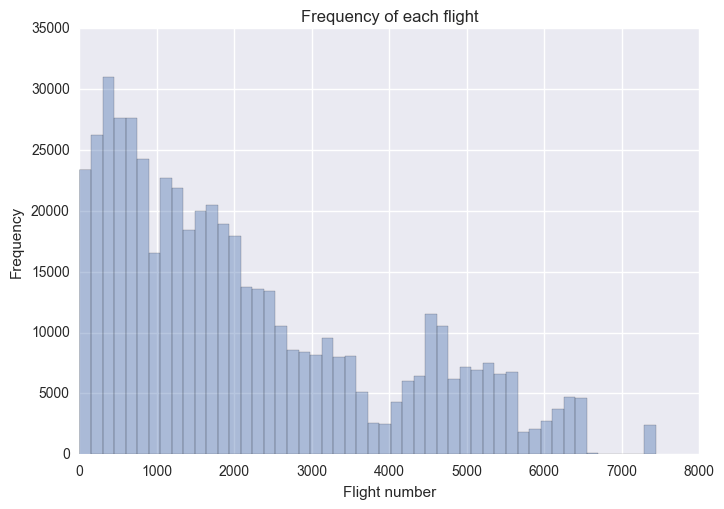

In [105]:
# sns.barplot(x='FlightNum', y='Count', data=dfn)
sns.distplot(df['FlightNum'], kde=False, rug=False)
# sns.distplot(df['FlightNum'])
sns.utils.axlabel('Flight number', 'Frequency')
plt.title('Frequency of each flight')
plt.savefig('graph/flightnums_freq.png', bbox_inches='tight')

### Quarters when the most frequent flight took place

In [37]:
flight = mode[0][0][0]
print(flight)
df[df['FlightNum'] == flight][:]['Quarter']

469


6295      1
6296      1
6297      1
6298      1
12098     1
12476     1
12859     1
14525     1
14568     1
14769     1
15907     1
16801     1
16928     1
17890     1
19427     1
21759     1
22162     1
22367     1
23060     1
23598     1
23599     1
23600     1
23601     1
23602     1
23603     1
23604     1
23605     1
29837     1
31278     1
31743     1
         ..
490825    3
491438    3
491698    3
492324    3
492996    3
493072    3
493152    3
494469    3
494470    3
494471    3
494472    3
497297    3
498239    3
498898    3
499023    3
500548    3
504429    3
505587    3
507654    3
510993    3
510994    3
510995    3
510996    3
510997    3
510998    3
510999    3
517742    3
518495    3
521389    3
523249    3
Name: Quarter, dtype: int64

### DepDelay average

In [35]:
np.mean(df['DepDelay'])


9.3005083331901677

In [34]:
np.std(df['DepDelay'])

36.807181965098536

In [39]:
dfg = df.groupby('DepDelay').count()
dfn = pd.DataFrame({'DepDelay': dfg.index, 'Count': dfg['Month']})
dfn.index = np.arange(dfn.shape[0])

In [55]:

import matplotlib.ticker as ticker

In [98]:
dfd = df[df['DepDelay'].notnull()]

In [99]:
df['DepDelay'].head(10)

0    -5.0
1   -10.0
2    -7.0
3    -7.0
4    -7.0
5    -4.0
6    -1.0
7    -4.0
8     1.0
9     0.0
Name: DepDelay, dtype: float64

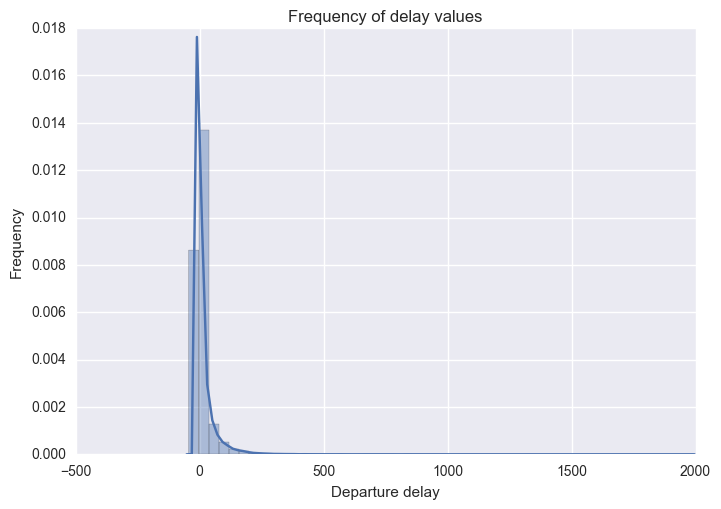

In [102]:
# sns.barplot(x='DepDelay', y='Count', data=dfn)
sns.distplot(dfd['DepDelay'])
sns.utils.axlabel('Departure delay', 'Frequency')
plt.title('Frequency of delay values')
# plt.xticks(rotation=90)
plt.savefig('graph/delay_flights.png', bbox_inches='tight')

### Distance

In [71]:
dfg = df.groupby('Distance').count()
dfn = pd.DataFrame({'Distance': dfg.index, 'Count': dfg['Month']})
dfn.index = np.arange(dfn.shape[0])

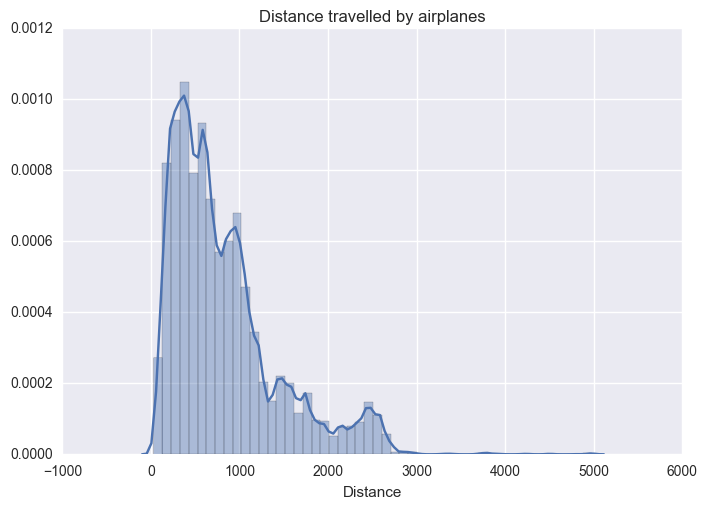

In [110]:
# sns.jointplot(x='Distance', y='Count', data=dfn)
# sns.utils.axlabel('Distance', 'Frequency')
sns.distplot(df['Distance'])
plt.title('Distance travelled by airplanes')
plt.savefig('graph/dist_flights.png', bbox_inches='tight')

### Cancelled

In [111]:
df['Cancelled'].head(15)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    0.0
12    0.0
13    1.0
14    0.0
Name: Cancelled, dtype: float64

In [113]:
dfg = df.groupby(['Cancelled']).count()
dfn = pd.DataFrame({'Cancelled': dfg.index, 'Count': dfg['Month']})
dfn.index = np.arange(dfn.shape[0])

In [119]:
dfn['Cancelled'] = ['No', 'Yes']

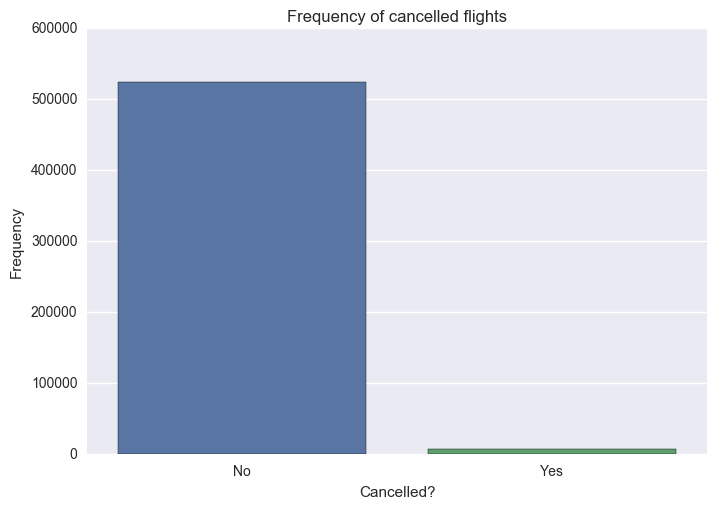

In [121]:
sns.barplot(x='Cancelled', y='Count', data=dfn)
sns.utils.axlabel('Cancelled?', 'Frequency')
plt.title('Frequency of cancelled flights')
plt.savefig('graph/cancelled_flights.png', bbox_inches='tight')

In [10]:
len(df[df['Cancelled'] == 1])

7904